In [231]:
#!pip install ggplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, Series
import statsmodels.formula.api as sm  #Building the optimal model using Backward Elimination
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import scipy, scipy.stats
from sklearn import svm
from ggplot import *

In [232]:
#Cleansed and Combined Dataset for Kansas City crime prediction
url='C:/Users/deepa/Downloads/Crime_Data/kcpd_agged_final.csv'

In [233]:
dataset=pd.read_csv(url)

In [234]:
#dataset.head()

In [235]:
#dataset.describe()

In [236]:
#dataset.info()

In [237]:
def describe_categorical(X):
    """
    This will create a table for looking at the categorical variables based on the dtype
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == 'object']].describe().to_html()))

In [238]:
describe_categorical(dataset)

,from_date,city
count,4363,4363
unique,84,40
top,2010-03-01,Kansas City
freq,58,4011


In [239]:
#dataset1[dataset1['city'] == 'Kansas City'].city.value_counts()

In [212]:
#dataset = dataset1[(dataset1['city'] == 'Kansas City')]

In [213]:
#Considering only those records which are having 'Kansas City' as the listed city 
#dataset['city'] = dataset['city'].apply(lambda x: 1 if x == 'Kansas City' else 0)

In [240]:
dataset.columns

Index(['Unnamed: 0', 'from_date', 'zip_code', 'offense_society',
       'offense_person', 'offense_property', 'offense_other', 'dv', 'firearm',
       'offense_total', 'year', 'month', 'quarter', 'zip', 'city',
       'population', 'unemployment_rate', 'house_price_index',
       'per_cap_income', 'new_priv_housing'],
      dtype='object')

In [241]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4363 entries, 0 to 4362
Data columns (total 20 columns):
Unnamed: 0           4363 non-null int64
from_date            4363 non-null object
zip_code             4363 non-null int64
offense_society      4363 non-null int64
offense_person       4363 non-null int64
offense_property     4363 non-null int64
offense_other        4363 non-null int64
dv                   4363 non-null int64
firearm              4363 non-null int64
offense_total        4363 non-null int64
year                 4363 non-null int64
month                4363 non-null int64
quarter              4363 non-null int64
zip                  4363 non-null int64
city                 4363 non-null object
population           4363 non-null int64
unemployment_rate    4363 non-null float64
house_price_index    4363 non-null float64
per_cap_income       4363 non-null int64
new_priv_housing     4363 non-null float64
dtypes: float64(3), int64(15), object(2)
memory usage: 681.8+ KB


In [323]:
dataset['from_date'] = (dataset['year'].astype(str)+dataset['month'].astype(str)).astype(int)

In [324]:
type(dataset['year'])

pandas.core.series.Series

In [325]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4363 entries, 0 to 4362
Data columns (total 19 columns):
Unnamed: 0           4363 non-null int64
from_date            4363 non-null int32
zip_code             4363 non-null int64
offense_society      4363 non-null int64
offense_person       4363 non-null int64
offense_property     4363 non-null int64
offense_other        4363 non-null int64
dv                   4363 non-null int64
firearm              4363 non-null int64
year                 4363 non-null int64
month                4363 non-null int64
quarter              4363 non-null int64
zip                  4363 non-null int64
city                 4363 non-null object
population           4363 non-null int64
unemployment_rate    4363 non-null float64
house_price_index    4363 non-null float64
per_cap_income       4363 non-null int64
new_priv_housing     4363 non-null float64
dtypes: float64(3), int32(1), int64(14), object(1)
memory usage: 630.7+ KB


In [245]:
#Correlation among all the features
print(dataset.corr())

                   Unnamed: 0  from_date  zip_code  offense_society  \
Unnamed: 0           1.000000   0.070079  0.029485         0.050931   
from_date            0.070079   1.000000  0.003544        -0.020236   
zip_code             0.029485   0.003544  1.000000        -0.013464   
offense_society      0.050931  -0.020236 -0.013464         1.000000   
offense_person      -0.006088  -0.022543 -0.085601         0.732168   
offense_property    -0.043287   0.015906 -0.016849         0.854455   
offense_other        0.036304   0.018279 -0.016868         0.909733   
dv                   0.081884  -0.017295  0.019898         0.942327   
firearm              0.039547  -0.026730 -0.050742         0.840795   
offense_total       -0.007575   0.001860 -0.028458         0.942247   
year                 0.989721   0.002728  0.021559         0.049468   
month                0.105780   0.747370  0.012872         0.021590   
quarter              0.104709   0.769962  0.014257         0.024104   
zip   

In [246]:
dataset.head(5)

,Unnamed: 0,from_date,zip_code,offense_society,offense_person,offense_property,offense_other,dv,firearm,offense_total,year,month,quarter,zip,city,population,unemployment_rate,house_price_index,per_cap_income,new_priv_housing
0,0,20101,64055,0,0,1,0,0,0,1,2010,1,1,64055,Independence,116792,8.8,165.14,40874,127.0
1,1,20101,64101,0,0,4,0,0,0,4,2010,1,1,64101,Kansas City,459946,8.8,165.14,40874,127.0
2,2,20101,64102,0,0,1,0,0,0,1,2010,1,1,64102,Kansas City,459946,8.8,165.14,40874,127.0
3,3,20101,64105,10,26,81,4,2,3,121,2010,1,1,64105,Kansas City,459946,8.8,165.14,40874,127.0
4,4,20101,64106,35,73,119,6,8,13,233,2010,1,1,64106,Kansas City,459946,8.8,165.14,40874,127.0


# Input Data Visualizations to understand relationship between predictors

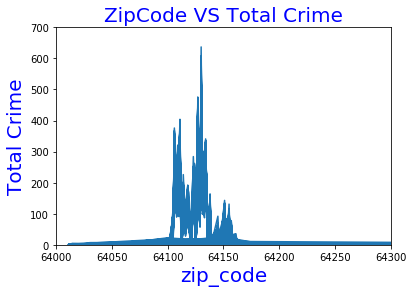

In [221]:
plt.plot( dataset['zip_code'],dataset['offense_total'])
plt.axis([64000,64300,0,700])
plt.ylabel('Total Crime',size=20,color='blue')
plt.xlabel('zip_code',size=20,color='blue')
plt.title('ZipCode VS Total Crime',size=20,color='blue')
plt.show()

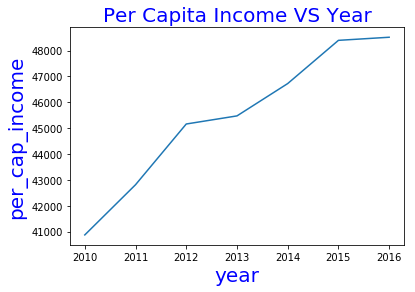

In [328]:
plt.plot( dataset['year'],dataset['per_cap_income'])
plt.ylabel('per_cap_income',size=20,color='blue')
plt.xlabel('year',size=20,color='blue')
plt.title('Per Capita Income VS Year',size=20,color='blue')
plt.show()

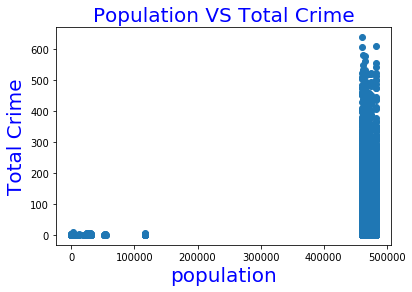

In [223]:
plt.scatter( dataset['population'],dataset['offense_total'])
plt.ylabel('Total Crime',size=20,color='blue')
plt.xlabel('population',size=20,color='blue')
plt.title('Population VS Total Crime',size=20,color='blue')
plt.show()

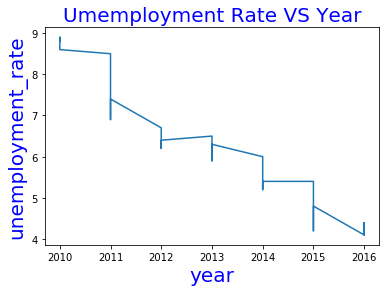

In [329]:
plt.plot( dataset['year'],dataset['unemployment_rate'])
plt.ylabel('unemployment_rate',size=20,color='blue')
plt.xlabel('year',size=20,color='blue')
plt.title('Umemployment Rate VS Year',size=20,color='blue')
plt.show()

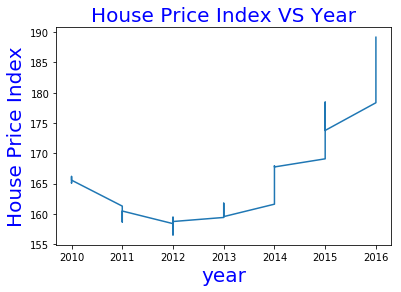

In [332]:
plt.plot( dataset['year'],dataset['house_price_index'])
#plt.axis([20101,201012,155,200])
plt.ylabel('House Price Index',size=20,color='blue')
plt.xlabel('year',size=20,color='blue')
plt.title('House Price Index VS Year',size=20,color='blue')
plt.show()

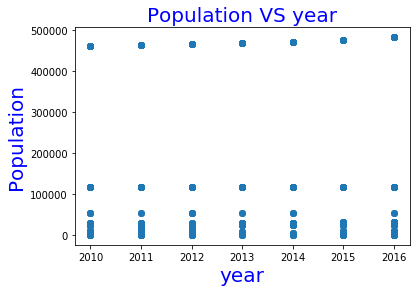

In [333]:
plt.scatter( dataset['year'],dataset['population'])
plt.ylabel('Population',size=20,color='blue')
plt.xlabel('year',size=20,color='blue')
plt.title('Population VS year',size=20,color='blue')
plt.show()

In [334]:
#Considering offense_total as the the response/dependent variable . Offense_total is summation of all 'offense_person',
#'offense_property', 'offense_society','offense_other'.
X=dataset
y=X.pop('offense_total')
#y=pd.DataFrame({'offense_total':y.values})


KeyError: 'offense_total'

In [335]:
#y
#y=pd.DataFrame({'offense_total':y.values})

In [336]:
X.columns
Features= pd.DataFrame(X.columns, columns=['Features/Predictors']) 
Features

,Features/Predictors
0,Unnamed: 0
1,from_date
2,zip_code
3,offense_society
4,offense_person
5,offense_property
6,offense_other
7,dv
8,firearm
9,year


# Building the optimal model using Backward Elimination

In [393]:
#Summary of the features along with important metrices.
#Drop few features from input dataset
##A predictor that has a low p-value is likely to be a meaningful addition to the model because 
#changes in the predictor's value are related to changes in the response variable.
#Based on the result set we can reject the #unemployment_rate and #new_priv_housing
#X_opt = X.iloc[:, [2,7,8,9,11,14,15,16,17]],
X_opt = X.iloc[:, [1,2,7,8,9,10,14,16,17]] #'zip_code', 'dv', 'firearm', 'year','population',house_price_index,'per_cap_income',,
regressor_OLS = sm.OLS(y, X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          offense_total   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     5193.
Date:                Sat, 28 Jul 2018   Prob (F-statistic):               0.00
Time:                        02:46:30   Log-Likelihood:                -22453.
No. Observations:                4363   AIC:                         4.492e+04
Df Residuals:                    4354   BIC:                         4.498e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
from_date          -1.22e-05   1.22e-05     -0.999      0.318   -3.61e-05    1.17e-05
zip_code             -0.1718      0.020     -8.724      0.000      -0.210      -0.133
dv                    4.6741      0.087     53.592      0.000       4.503       4.845
firearm               4.4774      0.100     44.723      0.000       4.281       4.674
year                  5.6455      0.639      8.839      0.000       4.393       6.898
month                 1.5678      0.281      5.580      0.000       1.017       2.119
population          9.36e-05   6.34e-06     14.774      0.000    8.12e-05       0.000
house_price_index    -0.7009      0.097     -7.228      0.000      -0.891      -0.511
per_cap_income       -0.0056      0.001    -10.835      0.000      -0.007      -0.005
==============================================================================
Omnibus:                      812.576   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3266.728
Skew:                           0.871   Prob(JB):                         0.00
Kurtosis:                       6.864   Cond. No.                     4.68e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Linear Regression

In [394]:
#Import train_test_split & LinearRegression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [395]:
#Train test split
lr_model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_opt, y, test_size=.2, random_state=0)

In [396]:
#y_test

In [397]:
model=lr_model.fit(X_train, y_train)
#lr_model.coef_ ,
lr_model.intercept_

27392.329552134575

In [398]:
#Displaying Coefficients for each input variable
coeff_df= pd.DataFrame(lr_model.coef_,X_opt.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
from_date,-0.000015
zip_code,-0.189877
dv,4.658942
firearm,4.378644
year,-7.631012
month,1.213200
population,0.000096
house_price_index,0.060034
per_cap_income,0.002504


In [399]:
#Actual VS Predicted
y_pred = lr_model.predict(X_test)  
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(10)

,Actual,Predicted
1503,91,103.311499
1569,4,33.094432
3883,6,24.789577
3931,258,278.648973
3223,61,28.257809
1326,121,61.822486
4358,39,35.656192
4004,1,7.667759
3582,10,29.611524
3876,173,145.198694


In [400]:
#Metrics
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))  )
print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, y_pred)**(0.05))  )

Mean Absolute Error: 29.316765785284808
Mean Squared Error: 1664.1192282368386
Root Mean Squared Error: 40.793617493878116
Root Mean Squared Error: 1.4489694266853979


In [401]:
from sklearn.metrics import r2_score
print("R^2: ", r2_score(y_test, y_pred)*100,'%')


R^2:  84.27323151129018 %


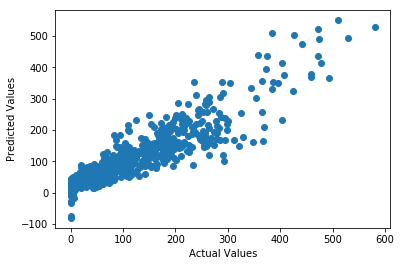

The more linear the graph the better we did at predicting y


In [402]:
#Actual VS Predicted
plt.scatter( y_test,y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
print("The more linear the graph the better we did at predicting y")

# Cross Validation on training Set

In [403]:
#CROSS VALIDATION
#y_CV=pd.DataFrame({'offense_total':y.values})
#X=dataset.drop('offense_total',axis=1)
X_CV = (X_train.iloc[:,0:].values).astype('float32')
y_CV=np.array(y_train)

In [404]:
print(len(y_CV))
type(y_CV)

3490


numpy.ndarray

In [405]:
from sklearn.model_selection import KFold # import KFold
X_CV=X_CV
y_CV = y_CV
kf = KFold(n_splits=5)#define the split - into 2 folds 
kf.get_n_splits(X_CV,y_CV) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=5, random_state=None, shuffle=False)
print(len(X_CV))
print(len(y_CV))

KFold(n_splits=5, random_state=None, shuffle=False)
3490
3490


In [406]:
#X_CV

In [407]:
for train_index, test_index in kf.split(X_CV,y_CV):
 print('TRAIN:', train_index, 'TEST:', test_index)
 X_CV_train, X_CV_test = X_CV[train_index], X_CV[test_index]
 y_CV_train, y_CV_test = y_CV[train_index], y_CV[test_index]


TRAIN: [ 698  699  700 ... 3487 3488 3489] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

In [408]:
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

In [409]:
model=lr_model.fit(X_CV_train, y_CV_train)
lr_model.coef_
lr_model.intercept_
y_pred_CV = model.predict(X_CV_test) 

In [410]:
from sklearn.metrics import r2_score
print("R^2: ", r2_score(y_CV_test, y_pred_CV))

R^2:  0.8730790483120558


In [411]:
#Perform 10-fold cross validation
#scores = cross_val_score(model, X_CV, y_CV, cv=10)
#print ("Cross-validated scores:", scores)
scores = cross_val_score(model, X_CV, y_CV, cv=10)
print ("Cross-validated scores:", scores)

Cross-validated scores: [0.86560882 0.83099768 0.82388362 0.86850182 0.83318966 0.80165127
 0.807514   0.86385769 0.89134555 0.85383202]


In [412]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.84 (+/- 0.06)


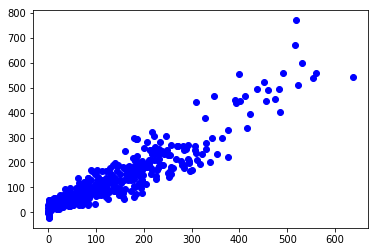

In [413]:
#predictions = cross_val_predict(model, X_CV, y_CV, cv=10)
plt.scatter(y_CV_test, y_pred_CV,color='blue')

In [414]:
#accuracy = metrics.r2_score(y_CV, predictions)
#print ("Cross-Predicted Accuracy:",accuracy*100,'%')

In [415]:
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.datasets import make_regression
#X_train, y_train = make_regression(n_features=8, n_informative=2,
 #                      random_state=0, shuffle=False)
#regr = RandomForestRegressor(max_depth=2, random_state=0)
#regr.fit(X_train, y_train)
#print(regr.feature_importances_)
#print(regr.predict([[0, 0, 0, 0,0, 0, 0, 0]]))
#y_pred_RF = regr.predict(X_test)
#print("RandomForest_R^2: ", r2_score(y_test, y_pred_RF))

# Decision Tree Regressor

In [416]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
y_pred_RG = regressor.predict(X_test)
print("DecisionTreeRegressor_R^2: ", r2_score(y_test, y_pred_RG))

DecisionTreeRegressor_R^2:  0.8871561971015788


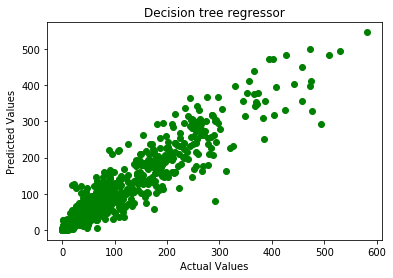

In [417]:
plt.scatter( y_test,y_pred_RG,color='green')
#plt.scatter( y_CV,predictions,color='red')
#plt.plot( y_test,y_pred,color='blue')
#plt.scatter( y_test,color='green')
#plt.scatter( y_pred_RG,color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision tree regressor')
plt.show()


# LASSO ALGO

In [418]:

from sklearn.linear_model import Lasso
alpha = 0.1
lasso = Lasso(alpha=alpha)
y_pred_lasso = lasso.fit(X_CV_train, y_CV_train).predict(X_CV_test)
r2_score_lasso = r2_score(y_CV_test, y_pred_lasso)
#y_pred_lasso = lasso.fit(X_CV_train, y_CV_train).predict(X_CV_test)
#r2_score_lasso = r2_score(y_CV_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.873165


# Predicted Data Visualization

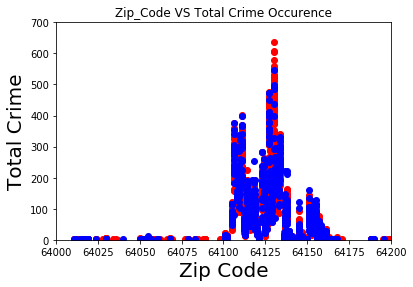

In [419]:
plt.scatter(X_train['zip_code'], y_train, color = 'red')
plt.scatter(X_test['zip_code'], regressor.predict(X_test), color = 'blue')
plt.title('Zip_Code VS Total Crime Occurence')
plt.xlabel('Zip Code',size=20,color='black')
plt.ylabel('Total Crime',size=20,color='black')
plt.axis([64000,64200,0,700])
plt.show()

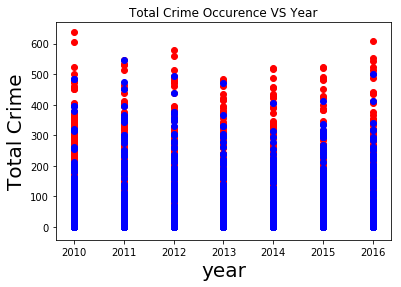

In [422]:
plt.scatter(X_train['year'], y_train, color = 'red')
plt.scatter(X_test['year'], regressor.predict(X_test), color = 'blue')
plt.title('Total Crime Occurence VS Year')
plt.xlabel('year',size=20,color='black')
plt.ylabel('Total Crime',size=20,color='black')
#plt.axis([64000,64200,0,700])
plt.show()

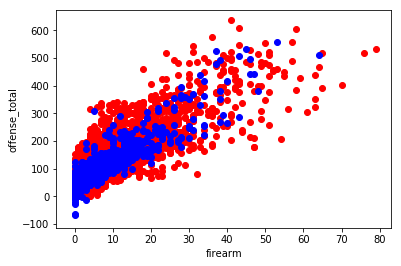

In [152]:
#Visualize the test model
plt.scatter(X_train['firearm'], y_train, color = 'red')
#plt.plot(X_test['firearm'], lr_model.predict(X_test), color='blue')
plt.scatter(X_test['firearm'], lr_model.predict(X_test), color='blue')
plt.xlabel('firearm')
plt.ylabel('offense_total')
plt.show()

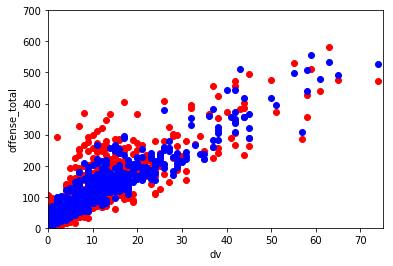

In [153]:
#Visualize the test model
plt.scatter(X_test['dv'], y_test, color = 'red')
#plt.plot(X_test['dv'], lr_model.predict(X_test), color='blue')
#plt.subplot(X_test['dv'], lr_model.predict(X_test), color='blue')
plt.scatter(X_test['dv'], lr_model.predict(X_test), color='blue')
plt.axis([0,75,0,700])
plt.xlabel('dv')
plt.ylabel('offense_total')
plt.show()

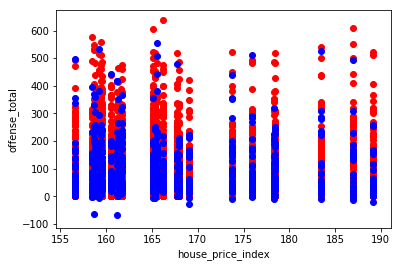

In [154]:
#Visualize the test model
plt.scatter(X_train['house_price_index'], y_train, color = 'red')
#plt.plot(X_train, lr_model.predict(X_train), color='blue')
plt.scatter(X_test['house_price_index'], lr_model.predict(X_test), color='blue')
plt.xlabel('house_price_index')
plt.ylabel('offense_total')
plt.show()

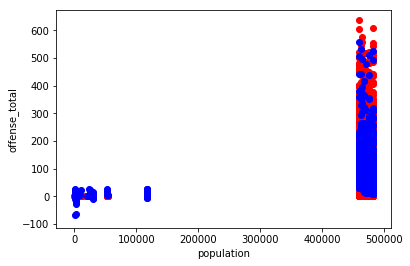

In [155]:
#Visualize the test model
plt.scatter(X_train['population'], y_train, color = 'red')
#plt.plot(X_train, lr_model.predict(X_train), color='blue')
plt.scatter(X_test['population'], lr_model.predict(X_test), color='blue')
plt.xlabel('population')
plt.ylabel('offense_total')
plt.show()

In [206]:
#chart = ggplot( X, aes(x='X_test.iloc[:,3]', y='y_test', color='y_test') ) \
 #       + geom_point(size=75,alpha=0.8) \
  #      + scale_color_gradient(low = 'red', high = 'blue') \
   #     + ggtitle("Crimes Occurance per Year")
#chart

In [285]:
#dataset['ZipCode'] = X_test.iloc[:,0]
#dataset['Offence_Occurence'] = y_test


In [207]:
#chart = ggplot( dataset, aes(x='X_opt.iloc[:,0]', y='y.values.reshape(-1,1)', color='y') ) \
 #       + geom_point(size=75,alpha=0.8) \
  #      + scale_color_gradient(low = 'yellow', high = 'blue') \
   #     + ggtitle("Crimes Occurance per zipcode") \
    #    + xlab('Zip Codes') \
     #   + ylab('Total Crime Occured') 
#chart

In [208]:
#dataset['month'] = X_test.iloc[:,4]
#dataset['Offence_Occurence'] = y_test
#chart = ggplot( dataset, aes(x='X_test.iloc[:,4]', y='y_test', color='y_test.values.reshape(-1,1)') ) \
 #       + geom_point(size=75,alpha=0.8) \
  #      + scale_color_gradient(low = 'red', high = 'blue') \
   #     + ggtitle("Crimes Occurance per month")
#chart



In [209]:
#dataset['house_price_index'] = X_test.iloc[:,8]
#dataset['Offence_Occurence'] = y_test
#chart = ggplot( dataset, aes(x='house_price_index', y='y_test', color='y_test.values.reshape(-1,1)') ) \
 #       + geom_point(size=75,alpha=0.8) \
  #      + scale_color_gradient(low = 'red', high = 'blue') \
   #     + ggtitle("Crimes Occurance per house_price_index")
#chart

In [105]:
#dataset['new_priv_housing'] = X_test.iloc[:,9]
#dataset['Offence_Occurence'] = y_test
#chart = ggplot( dataset, aes(x='X_test.iloc[:,9]', y='y_test', color='y_test.values.reshape(-1,1)') ) \
    #    + geom_point(size=75,alpha=0.8) \
   #     + scale_color_gradient(low = 'red', high = 'blue') \
   #     + ggtitle("Crimes Occurance per new_priv_housing")
#chart

In [210]:

#dataset['firearm'] = X_test.iloc[:,2]
#dataset['Offense_Total'] = y_test
#chart = ggplot( dataset, aes(x='X_test.iloc[:,2]', y='y_test', color='y_test.values.reshape(-1,1)') ) \
 #       + geom_point(size=75,alpha=0.8) \
  #      + scale_color_gradient(low = 'red', high = 'blue') \
   #     + ggtitle("Crimes Occurance as per FireArm")
#chart

In [211]:
#dataset['per_cap_income'] = X_test.iloc[:,8]
#dataset['Offense_Total'] = y_test
#chart = ggplot( dataset, aes(x='X_test.iloc[:,8]', y='y_test', color='y_test.values.reshape(-1,1)') ) \
 #       + geom_point(size=75,alpha=0.8) \
  #      + scale_color_gradient(low = 'red', high = 'blue') \
   #     + ggtitle("Crimes Occurance as per Per Capita Income")
#chart




In [212]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)
reg.fit (X_CV, y_CV) 


reg.coef_

reg.intercept_ 


C:\Users\deepa\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.122102832682106e-12 / 5.960464477539063e-08
  RuntimeWarning)


26791.04

In [214]:
from sklearn import linear_model
reg = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])
reg.fit(X_train, y_train)       
reg.alpha_  

10.0

In [215]:
from sklearn.tree import DecisionTreeRegressor

In [216]:
regressor = DecisionTreeRegressor(random_state = 0)

In [217]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [218]:
y_pred = regressor.predict(X_test)

In [219]:
cross_val_score(regressor,X_test, y_test, cv=10)

array([0.93014872, 0.76168618, 0.90498946, 0.87847852, 0.78570962,
       0.89470014, 0.81966964, 0.84806672, 0.85194877, 0.75837279])

In [221]:
r2_score( y_test,y_pred)


0.890083246814378

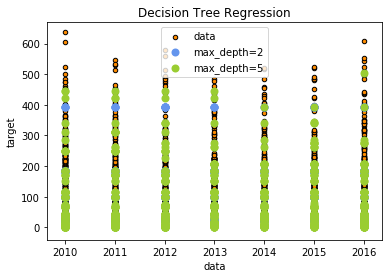

In [536]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

# Predict
#X_test = np.arange(0.0, 5.0, 0.01)[:,0]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X_train['year'], y_train, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.scatter(X_test['year'], y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.scatter(X_test['year'], y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [305]:
X_opt.iloc[:,0]

0        20101
1        20101
2        20101
3        20101
4        20101
5        20101
6        20101
7        20101
8        20101
9        20101
10       20101
11       20101
12       20101
13       20101
14       20101
15       20101
16       20101
17       20101
18       20101
19       20101
20       20101
21       20101
22       20101
23       20101
24       20101
25       20101
26       20101
27       20101
28       20101
29       20101
         ...  
4333    201612
4334    201612
4335    201612
4336    201612
4337    201612
4338    201612
4339    201612
4340    201612
4341    201612
4342    201612
4343    201612
4344    201612
4345    201612
4346    201612
4347    201612
4348    201612
4349    201612
4350    201612
4351    201612
4352    201612
4353    201612
4354    201612
4355    201612
4356    201612
4357    201612
4358    201612
4359    201612
4360    201612
4361    201612
4362    201612
Name: from_date, Length: 4363, dtype: int32

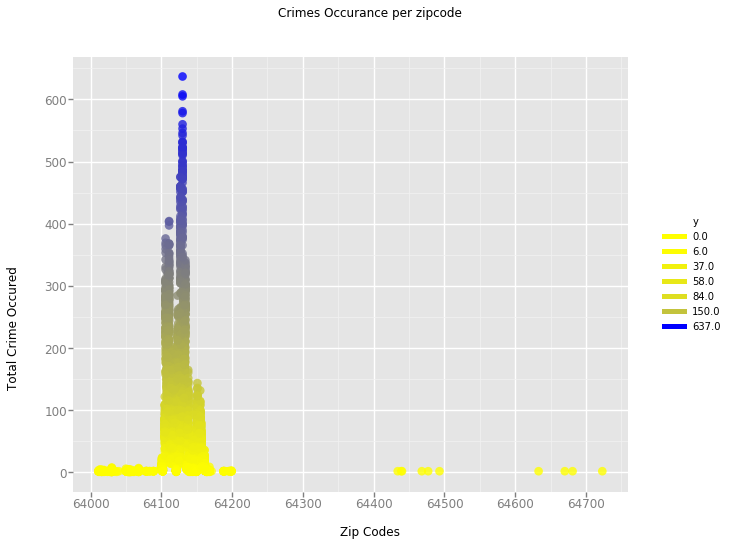

<ggplot: (114863430783)>

In [423]:
chart = ggplot( dataset, aes(x='X_opt.iloc[:,1].values.reshape(-1,1)', y='y.values.reshape(-1,1)', color='y') ) \
        + geom_point(size=75,alpha=0.8) \
        + scale_color_gradient(low = 'yellow', high = 'blue') \
        + ggtitle("Crimes Occurance per zipcode") \
        + xlab('Zip Codes') \
        + ylab('Total Crime Occured') 
chart

In [ ]:
chart = ggplot( dataset, aes(x='dataset.iloc[:,9]', y='dataset.iloc[:,15].values.reshape(-1,1)', color='dataset.iloc[:,15]') ) \
        + geom_point(size=75,alpha=0.8) \
        + scale_color_gradient(low = 'yellow', high = 'blue') \
        + ggtitle("Unemployment Rate per zipcode") \
        + xlab('Year') \
        + ylab('Unemployment Rate') 
chart

In [ ]:
chart = ggplot( dataset, aes(x='dataset.iloc[:,9]', y='dataset.iloc[:,16].values.reshape(-1,1)', color='dataset.iloc[:,16]') ) \
        + geom_point(size=85,alpha=0.8) \
        + scale_color_gradient(low = 'yellow', high = 'blue') \
        + ggtitle("House Price per year") \
        + xlab('Year') \
        + ylab('House Price Index') 
chart

In [ ]:
chart = ggplot( dataset, aes(x='dataset.iloc[:,9]', y='dataset.iloc[:,17].values.reshape(-1,1)', color='dataset.iloc[:,17]') ) \
        + geom_point(size=85,alpha=0.8) \
        + scale_color_gradient(low = 'yellow', high = 'blue') \
        + ggtitle("Per Capita Income per year") \
        + xlab('Year') \
        + ylab('Per Capita Income') \
        + theme(axis.text=element_text(size=12))
chart

In [ ]:
chart = ggplot( dataset, aes(x='dataset.iloc[:,9]', y='dataset.iloc[:,14]') )\
        + geom_point(size=75,alpha=0.8) \
        + scale_color_gradient(low = 'yellow', high = 'blue') \
        + ggtitle("Crimes Occurance per year") \
        + xlab('Year') \
        + ylab('Population') 
chart